In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
moves = pd.read_hdf('/home/grobleke/OTB.h5', mode='r', key='moves')
# moves = pd.read_csv('/home/grobleke/OTB_small.csv')
# store = pd.HDFStore('/home/kelleyld/OTB.h5', mode='r')

In [8]:
moves.dtypes

GameID               int64
Turn              category
Ply                  int16
MovedPiece        category
SourceCol         category
SourceRow         category
DestCol           category
DestRow           category
CapturedPiece     category
PromotionPiece    category
CheckState        category
CastleSide        category
dtype: object

In [9]:
moves.PromotionPiece.value_counts()

queen     365417
knight      5539
rook        4834
bishop      1053
Name: PromotionPiece, dtype: int64

In [10]:
moves.CastleSide.value_counts()

k    9826041
q    1153242
Name: CastleSide, dtype: int64

In [11]:
colorless = moves
colorless.MovedPiece = colorless.MovedPiece.str.lower()
colorless.CapturedPiece = colorless.CapturedPiece.str.lower()

In [12]:
capture_squares = colorless[colorless.CapturedPiece.notnull()][['DestCol', 'DestRow', 'MovedPiece', 'CapturedPiece']]
capture_map = pd.crosstab(capture_squares.DestRow, capture_squares.DestCol, normalize=True)

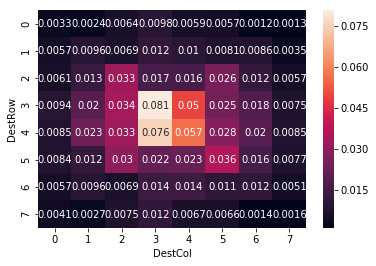

In [13]:
sns.heatmap(capture_map, annot=True)

In [89]:
capture_stats = pd.crosstab(capture_squares.MovedPiece, capture_squares.CapturedPiece, normalize=True)

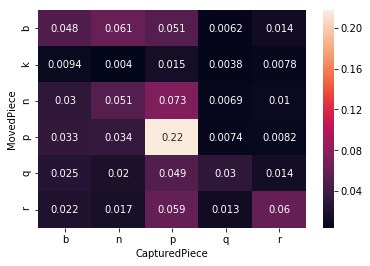

In [90]:
sns.heatmap(capture_stats, annot=True)

In [91]:
check_moves = colorless[colorless.CheckState.notnull()]

In [92]:
check_moves.MovedPiece.value_counts()

r    1088229
q    1088035
n     518344
b     454222
p     252740
k       6293
Name: MovedPiece, dtype: int64

In [93]:
promotions = moves[moves.PromotionPiece.notnull()]

In [94]:
promotions.DestCol.value_counts()

a    8765
b    7905
c    7738
d    7465
e    6119
f    6118
h    5635
g    5002
Name: DestCol, dtype: int64

In [95]:
source_map = pd.crosstab(moves.SourceRow, moves.SourceCol, normalize=True)
dest_map = pd.crosstab(moves.DestRow, moves.DestCol, normalize=True)

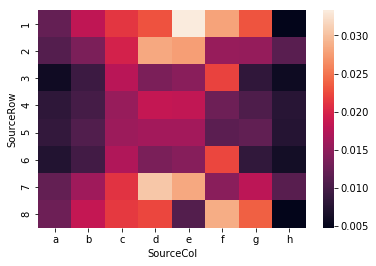

In [96]:
sns.heatmap(source_map)

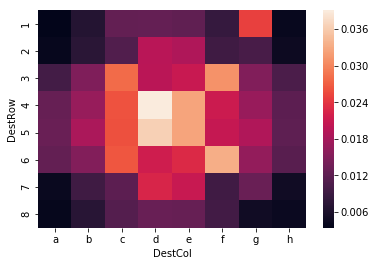

In [97]:
sns.heatmap(dest_map)

In [98]:
white_first_moves = moves[moves.Ply == 1]
black_first_moves = moves[moves.Ply == 2]
white_pawn_moves = white_first_moves[white_first_moves.MovedPiece == 'p']
black_pawn_moves = black_first_moves[black_first_moves.MovedPiece == 'p']

In [99]:
white_first_moves.MovedPiece.value_counts()

p    832452
n     71020
Name: MovedPiece, dtype: int64

In [100]:
white_pawn_moves.SourceCol.value_counts()

e    450936
d    297162
c     61616
b      8226
f      7039
g      6671
a       588
h       214
Name: SourceCol, dtype: int64

In [101]:
pawn_move_pairs = pd.merge(white_pawn_moves, black_pawn_moves, on='GameID', suffixes=['_w', '_b'])
pawn_move_map = pd.crosstab(pawn_move_pairs.SourceCol_b, pawn_move_pairs.SourceCol_w, normalize=True)

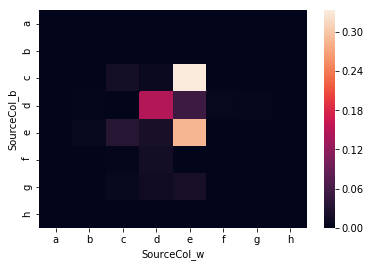

In [102]:
sns.heatmap(pawn_move_map)

In [14]:
def add_suffixes(df, i, label):
    ret = df[df.Ply == i].drop('Ply', axis=1)
    cols = ['MovedPiece', 'SourceCol', 'SourceRow', 'DestCol', 'DestRow']
    for col in cols:
        ret.rename(columns={col: (col + '_' + label)}, inplace = True)
    return ret

In [15]:
moves1 = moves[['GameID', 'Ply', 'MovedPiece', 'SourceCol', 'SourceRow', 'DestCol', 'DestRow']]
white_moves_1 = add_suffixes(moves1, 1, 'w1')
white_moves_2 = add_suffixes(moves1, 3, 'w2')
white_moves_3 = add_suffixes(moves1, 5, 'w3')
white_moves_4 = add_suffixes(moves1, 7, 'w4')
white_moves_5 = add_suffixes(moves1, 9, 'w5')

# white_opening_book = pd.merge(white_moves_1, white_moves_2, on='GameID')
# white_opening_book = pd.merge(white_opening_book, white_moves_3, on='GameID')
# white_opening_book = pd.merge(white_opening_book, white_moves_4, on='GameID')
# white_opening_book = pd.merge(white_opening_book, white_moves_5, on='GameID')

In [16]:
group_cols_w = white_opening_book.columns.drop('GameID').values
white_opening_book.groupby(list(group_cols_w)).size().reset_index(name='count').sort_values('count', ascending=False).head(10)

,MovedPiece_w1,SourceCol_w1,SourceRow_w1,DestCol_w1,DestRow_w1,MovedPiece_w2,SourceCol_w2,SourceRow_w2,DestCol_w2,DestRow_w2,...,SourceCol_w4,SourceRow_w4,DestCol_w4,DestRow_w4,MovedPiece_w5,SourceCol_w5,SourceRow_w5,DestCol_w5,DestRow_w5,count
71178,p,4,1,4,3,n,6,0,5,2,...,5,2,3,3,n,1,0,2,2,529610
67275,p,4,1,4,3,n,6,0,5,2,...,1,4,0,3,k,4,0,6,0,143685
43742,p,3,1,3,3,p,2,1,2,3,...,4,1,4,3,n,6,0,5,2,60050
40913,p,3,1,3,3,n,6,0,5,2,...,5,0,6,1,k,4,0,6,0,47973
80824,p,4,1,4,3,p,3,1,3,3,...,4,3,4,4,p,0,1,0,2,47249
44553,p,3,1,3,3,p,2,1,2,3,...,6,1,6,2,b,5,0,6,1,45271
43757,p,3,1,3,3,p,2,1,2,3,...,4,1,4,3,p,5,1,5,2,42809
83987,p,4,1,4,3,p,3,1,3,3,...,2,1,2,2,n,6,0,5,2,42455
66202,p,4,1,4,3,n,1,0,2,2,...,5,0,6,1,p,3,1,3,2,40661
43429,p,3,1,3,3,p,2,1,2,3,...,6,0,5,2,b,2,0,6,4,36799


In [17]:
black_moves_1 = add_suffixes(moves1, 2, 'b1')
black_moves_2 = add_suffixes(moves1, 4, 'b2')
black_moves_3 = add_suffixes(moves1, 6, 'b')
black_moves_4 = add_suffixes(moves1, 8, 'b4')
black_moves_5 = add_suffixes(moves1, 10, 'b5')

# black_opening_book = pd.merge(black_moves_1, black_moves_2, on='GameID')
# black_opening_book = pd.merge(black_opening_book, black_moves_3, on='GameID')
# black_opening_book = pd.merge(black_opening_book, black_moves_4, on='GameID')
# black_opening_book = pd.merge(black_opening_book, black_moves_5, on='GameID')

# group_cols_b = black_opening_book.columns.drop('GameID').values
# black_opening_book.groupby(list(group_cols_b)).size().reset_index(name='count').sort_values('count', ascending=False).head(10)

,MovedPiece_b1,SourceCol_b1,SourceRow_b1,DestCol_b1,DestRow_b1,MovedPiece_b2,SourceCol_b2,SourceRow_b2,DestCol_b2,DestRow_b2,...,SourceCol_b4,SourceRow_b4,DestCol_b4,DestRow_b4,MovedPiece_b5,SourceCol_b5,SourceRow_b5,DestCol_b5,DestRow_b5,count
24758,n,6,7,5,5,p,6,6,6,5,...,3,6,3,5,k,4,0,6,0,181976
42833,p,2,6,2,4,p,3,6,3,5,...,6,7,5,5,p,0,6,0,5,163169
24542,n,6,7,5,5,p,6,6,6,5,...,4,0,6,0,p,3,6,3,5,139468
98213,p,4,6,4,4,n,1,7,2,5,...,6,7,5,5,b,5,7,4,6,90419
42843,p,2,6,2,4,p,3,6,3,5,...,6,7,5,5,p,6,6,6,5,64974
128876,p,4,6,4,5,p,3,6,3,4,...,5,5,3,6,p,2,6,2,4,62816
32518,p,2,6,2,4,n,1,7,2,5,...,6,7,5,5,p,4,6,4,4,50343
87358,p,3,6,3,5,n,6,7,5,5,...,5,7,6,6,k,4,0,6,0,43526
32517,p,2,6,2,4,n,1,7,2,5,...,6,7,5,5,p,3,6,3,5,40099
42825,p,2,6,2,4,p,3,6,3,5,...,6,7,5,5,n,1,7,2,5,37982


In [28]:
full_opening_book_1 = pd.merge(white_moves_1, black_moves_1, on='GameID')
full_opening_book_2 = pd.merge(full_opening_book_1, white_moves_2, on='GameID')
full_opening_book_2 = pd.merge(full_opening_book_2, black_moves_2, on='GameID')
full_opening_book_3 = pd.merge(full_opening_book_2, white_moves_3, on='GameID')
full_opening_book_3 = pd.merge(full_opening_book_3, black_moves_3, on='GameID')
full_opening_book_4 = pd.merge(full_opening_book_3, white_moves_4, on='GameID')
full_opening_book_4 = pd.merge(full_opening_book_4, black_moves_4, on='GameID')
full_opening_book_5 = pd.merge(full_opening_book_4, white_moves_5, on='GameID')
full_opening_book_5 = pd.merge(full_opening_book_5, black_moves_5, on='GameID')

In [29]:
group_cols = full_opening_book_1.columns.drop('GameID').values
openings_1 = full_opening_book_1.groupby(list(group_cols)).size().reset_index(name='count').sort_values('count', ascending=False)
openings_1['freq'] = openings_1['count']/moves.shape[0]


In [30]:
openings_1.head()

,MovedPiece_w1,SourceCol_w1,SourceRow_w1,DestCol_w1,DestRow_w1,MovedPiece_b1,SourceCol_b1,SourceRow_b1,DestCol_b1,DestRow_b1,count,freq
232,p,4,1,4,3,p,2,6,2,4,1229180,0.002577
187,p,3,1,3,3,n,6,7,5,5,1139580,0.002390
236,p,4,1,4,3,p,4,6,4,4,823965,0.001728
195,p,3,1,3,3,p,3,6,3,4,589282,0.001236
237,p,4,1,4,3,p,4,6,4,5,413551,0.000867


The most common opening sequence (five complete turns) in our dataset is the following, presented here in standard PGN notation:
1. e4 c5
2. Nf3 d6
3. d4 cxd4
4. Nxd4 Nf6
5. Nc3 a6


This is the Najdorf Variation of the Sicilian Defence

In [ ]:
1+1